# **Lab 4: Function approximation**
**Felipe Vicencio**

# **Abstract**

In this lab we implement a method for a approximating a continuous function $f: \mathbb{R} \to \mathbb{R}$ using piecewise linear polynomials. The results are positive.

#**About the code**

In [0]:
"""This program is a template for lab reports in the course"""
"""DD2363 Methods in Scientific Computing, """
"""KTH Royal Institute of Technology, Stockholm, Sweden."""

# Copyright (C) 2020 Felipe Vicencio (fivn@kth.se)

# This file is part of the course DD2363 Methods in Scientific Computing
# KTH Royal Institute of Technology, Stockholm, Sweden
#
# This is free software: you can redistribute it and/or modify
# it under the terms of the GNU Lesser General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.

'KTH Royal Institute of Technology, Stockholm, Sweden.'

# **Set up environment**

In [0]:
# Load neccessary modules.
from google.colab import files

import math
import matplotlib.pyplot as plt
import time
import numpy as np
import sympy as sp

# **Introduction**

The $L^2$ projection $Pf$ of a continuous function $f$ into the space $V$ of continuous linear piecewise polynomials in an interval is the best approximation of $f$ in $V$.

If $\phi = \{\phi_k\}_{k \in K}$ is a basis of $V$ the definition of the projection leads to:

\begin{align*}
\sum_{j \in K} \alpha_j(\phi_k, \phi_j) = (f, \phi_k) \quad \forall k \in K
\end{align*}

Where $\alpha = \{\alpha_k\}_{k \in K}$ are the coordinates of $Pf$ in the basis $\phi$. Thus, this can be written as a linear system of equations $A\alpha = b$.

The basis we use are the hat functions.

For more information the reader can consult the lecture notes.

# **Methods**

The proj method takes a NumPy array x which contains the nodes, and a SymPy function f.

The method fills in the matrix $A$ and the vector $b$. To do so it iterates through the diagonal of $A$ and it does the following operations:

* $A[n][n] += (\lambda_0, \lambda_0)$
* $A[n + 1][n] += (\lambda_1, \lambda_0)$
* $A[n][n + 1] += (\lambda_0, \lambda_1)$
* $A[n + 1][n + 1] += (\lambda_1, \lambda_1)$
* $b[n] += (f, \lambda_0)$
* $b[n + 1] += (f, \lambda_1)$

Where $\lambda_0, \lambda_1$ are the shape functions which make up the hat functions.

The method uses the following exact formulas  obtained from the lecture notes:

* $(\lambda_0, \lambda_0) = (\lambda_1, \lambda_1) = h/3$
* $(\lambda_1, \lambda_0) = (\lambda_0, \lambda_1) = h/6$

The method outputs the solution to the linear system of equations $A\alpha = b$, which is also the evaluation of the projection of the function at the nodes (this is a property of the hat functions).

For more information the reader can consult the lecture notes.

In [0]:
t = sp.symbols('t')

In [0]:
def proj(x, f):
  lenx = len(x)
  A = np.zeros((lenx, lenx))
  b = np.zeros(lenx)
  for n in range(lenx - 1):
    # Interval variables
    h = x[n + 1] - x[n]
    hThirds = h/3
    hSixths = h/6

    # Local to global map
    A[n][n] += hThirds
    A[n + 1][n] += hSixths
    A[n][n + 1] += hSixths
    A[n + 1][n + 1] += hThirds
    b[n] += sp.integrate(f*(x[n + 1] - t)/h, (t, x[n], x[n + 1]))
    b[n + 1] += sp.integrate(f*(t - x[n])/h, (t, x[n], x[n + 1]))
  alpha = np.linalg.solve(A, b)
  return alpha

# **Results**

We test with the function $f(x) = x^3$ in the interval $[-100, 100]$. We divide it successively in $k = 2, \ldots, k= 101$ subintervals of the same size.

We calculate $error(k) = \|f(x_k) - Pf(x_k)\|$, where $g(x_k)$ is the vector obtained from evaluating $g$ at the $k + 1$ nodes in iteration $k$. This represents the accuracy.

We calculate $derror(k) = \|error(k + 1) - error(k)\|$. This represents the rate of convergence.

The accuracy is verified graphically with a graph because the error approaches $0$.

The rate of convergence is verified graphically with a log-log graph.

Finally, we also plot $f(x)$ and the best $Pf(x)$ obtained.

These notions for accuracy and rate of convergence are the same Fabián Levicán used, as I collaborated with him.

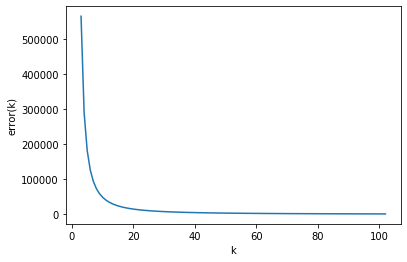

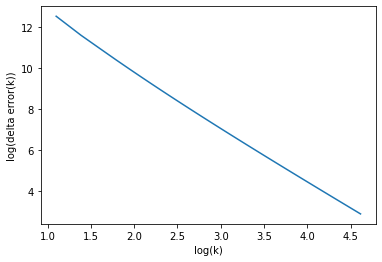

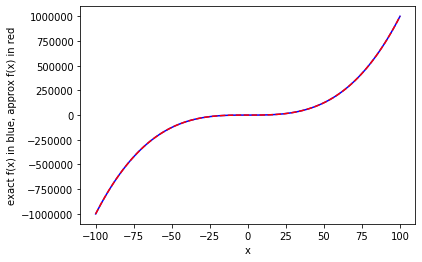

In [0]:
def createx(n):
  x = np.zeros(n + 1)
  for k in range(n + 1):
    x[k] = -100 + 200.0/n*k
  return x

nTests = 100
err = np.zeros(nTests)
derr = np.zeros(nTests - 1)

for k in range(nTests):
  x = createx(2 + k)
  exact = [x[j]**3 for j in range(3 + k)]
  approx = proj(x, t**3)
  err[k] = np.linalg.norm(exact - approx)
  
for k in range(nTests - 1):
  derr[k] = abs(err[k + 1] - err[k])

plt.plot([3 + k for k in range(nTests)], err)
plt.xlabel('k')
plt.ylabel('error(k)')
plt.show()

plt.plot([math.log(3 + k) for k in range(nTests - 1)], [math.log(derr[k]) for k in range(nTests - 1)])
plt.xlabel('log(k)')
plt.ylabel('log(delta error(k))')
plt.show()

plt.plot(x, exact, 'b-')
plt.plot(x, approx, 'r--')
plt.xlabel('x')
plt.ylabel('exact f(x) in blue, approx f(x) in red')
plt.show()

# **Discussion**

All results were positive. I think it's interesting that the testing takes so long, the plots are so smooth, and the approximation seems to be so exact.

I collaborated with Fabián Levicán.